In [1]:
import os
import numpy as np
import pandas as pd
import cantera as ct
from time import time
import argparse
import matplotlib.pyplot as plt

In [2]:
# Directories
DIR     = os.getcwd()
DATA    = os.path.join(DIR, "data", "csv")

In [3]:
def reader(csv:str):
    data = np.loadtxt(csv, delimiter=',', unpack=True)
    return data
from scipy.interpolate import interp1d
def func_interpolate(xData, yData, kind='linear'):
    return interp1d(xData, yData, kind=kind)

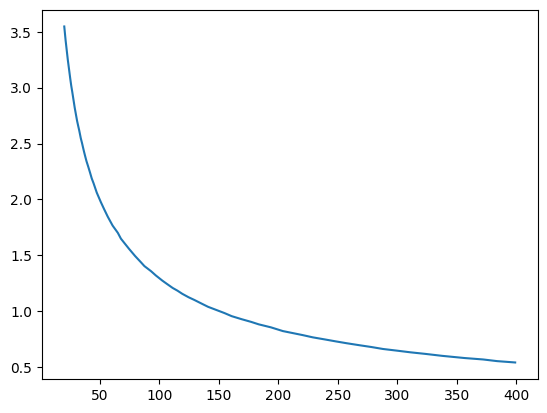

In [20]:
x1, y1 = reader("/Users/raja/Library/CloudStorage/OneDrive-SharedLibraries-McGillUniversity/CombustionDynamicsF2025 - General/04. Code - git repo/src/notebooks/fig5-33.csv")
f1 = func_interpolate(x1, y1)
I = np.sqrt(y1) * 100
plt.plot(x1, I)


# Find the index of the point on x1 where I = 2.5


In [ ]:
from scipy.interpolate import interp1d

# Create an interpolation function from I to indices
I_to_x = interp1d(I, x1, kind='linear', fill_value='extrapolate')
x_at_val = I_to_x(2.95)
idx = np.argmin(np.abs(x1 - x_at_val))

print(f"Index: {idx}")
print(f"x1 value at index: {x1[idx]}")
print(f"Interpolated x value where I=2.5: {x_at_2_5}")

Index: 5
x1 value at index: 26.6851
Interpolated x value where I=2.5: 26.828285601933406


[19.9381     20.01391718 20.08973436 20.16555154 20.24136872 20.3171859
 20.39300308 20.46882026 20.54463744 20.62045462 20.6962718  20.77208898
 20.84790616 20.92372334 20.99954052 21.0753577  21.15117488 21.22699206
 21.30280924 21.37862642 21.4544436  21.53026078 21.60607796 21.68189514
 21.75771232 21.8335295  21.90934668 21.98516386 22.06098104 22.13679822
 22.2126154  22.28843258 22.36424976 22.44006694 22.51588412 22.5917013
 22.66751848 22.74333566 22.81915284 22.89497002 22.9707872  23.04660438
 23.12242156 23.19823874 23.27405592 23.3498731  23.42569028 23.50150746
 23.57732464 23.65314182 23.728959   23.80477618 23.88059336 23.95641054
 24.03222772 24.1080449  24.18386208 24.25967926 24.33549644 24.41131362
 24.4871308  24.56294798 24.63876516 24.71458234 24.79039952 24.8662167
 24.94203388 25.01785106 25.09366824 25.16948542 25.2453026  25.32111978
 25.39693696 25.47275414 25.54857132 25.6243885  25.70020568 25.77602286
 25.85184004 25.92765722 26.0034744 ]
[0.03546576 0.03

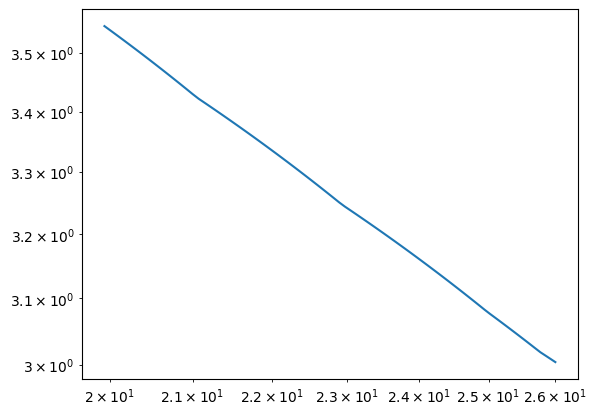

In [6]:
x_M_range   = np.linspace(min(x1), max(x1), 5001)

# Create a filterd list where we remove the turbulent intensity < 3%
u_U_squared = np.zeros_like(x_M_range)
I_range     = np.zeros_like(x_M_range)

for i, x_M in enumerate(x_M_range):
    u_U_squared[i]  = f1(x_M)
    I_range[i]      = np.sqrt(f1(x_M))


mask = I_range >= 0.03
x_M_filtered = x_M_range[mask]
I_filtered = I_range[mask]

print(x_M_filtered)
print(I_filtered)

plt.loglog(x_M_filtered, I_filtered*100)
plt.show()

In [7]:
# if M = 0.003 mm

M = 0.004

x0 = 2 * M
x1 = max(x_M_filtered) * M

print(x0*100, x1*100)

x1_x0 = x1 - x0

print(x1_x0)

0.8 10.401389759999999
0.09601389759999998


In [8]:
eta = 0.02 / x1_x0
print(eta)

0.20830317797660164
